<a href="https://colab.research.google.com/github/seo-minsu/machine_learning_study-minsu-/blob/main/XGBoost__minsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## XGBoost
 * 여러 개의 작은 결정 트리를 순차적으로 쌓아 예측 오차를 줄이는 빠르고 강력한 부스팅 기법으로, 표형 데이터의 분류·회귀 문제에 널리 쓰임.

**1. 파생:**
 * Gradient Boosting은 **Gradient(또는 잔차(residual))를 이용하여 이전 모형의 약점을 보완**하는 새로운 모형을 순차적으로 결합한 뒤 이들을 선형 결합하여 얻어진 모형을 생성하는 지도 학습 알고리즘
 * 그런데, GBM은 느리고, 과적합 규제가 부재하다는 단점이 있음

 → Extreme Gradient Boost : 기존 Gradient Boosting 알고리즘에 과적합 방지를 위한 기법이 추가된 지도 학습 알고리즘(파라미터(λ,γ)가 추가됨)

**2. 따라서, GBM과 마찬가지로 기본 학습기를 의사결정나무로 하고, Gradient(잔차)를 이용하여 이전 모형의 약점을 보완하는 방식으로 학습**

**3. 특징**

  * 빠르고 효율적인 학습 속도
  
  *  파라미터를 통해 과적합 제어 가능

  * 분류, 회귀 모두 효과적

**4. 언제 사용하는가?**

  * 표 형태의 데이터를 다룰 때
  
  * 높은 예측 정확도가 필요할 때

**5. 알고리즘**

 ① 첫 번째 트리를 만들고, 예측 오차(잔차)를 계산

 ② 두 번째 트리는 이 잔차를 줄이는 방향으로 학습

 ③ 이런 과정을 수십 번~수백 번 반복하며 오차를 점점 줄임

 ④ 마지막 모델은 모든 트리의 예측을 합산하여 최종 예측값 생성


**6. 파이썬 사용 흐름**

 ① 데이터 준비 → xgboost.DMatrix로 변환(데이터 스케일링 불필요)

 ② 하이퍼파라미터 설정 (learning_rate, max_depth 등)

 ③ xgboost.train() 또는 sklearn의 XGBClassifier/Regressor로 학습

 ④ early_stopping 적용하여 과적합 방지

 ⑤ 최적 모델로 예측 및 성능 평가


**참고**
  - 정교한 과적합 제어가 가능함.
  - 중요한 변수를 바로 파악할 수 있음
  - 교차검증(cv)과 조기 중단(early stopping) 필수


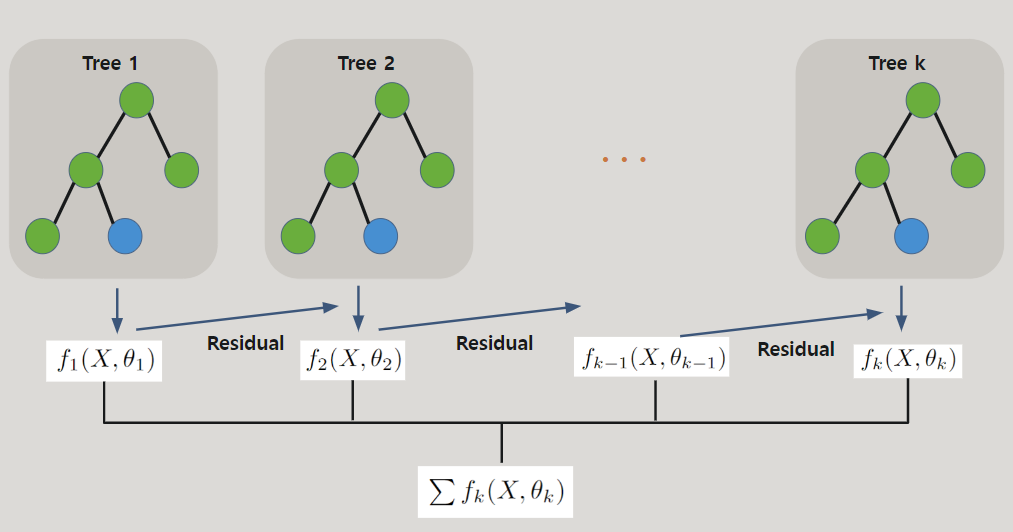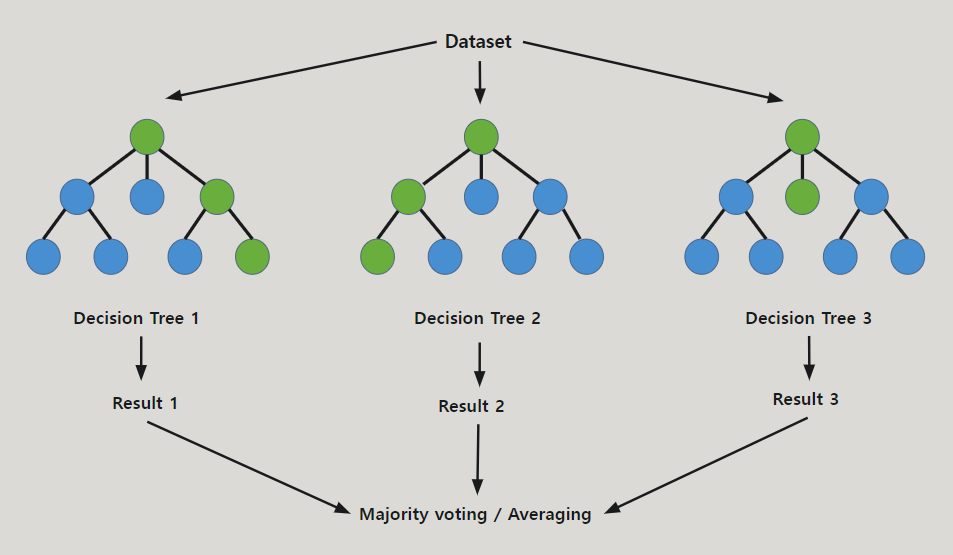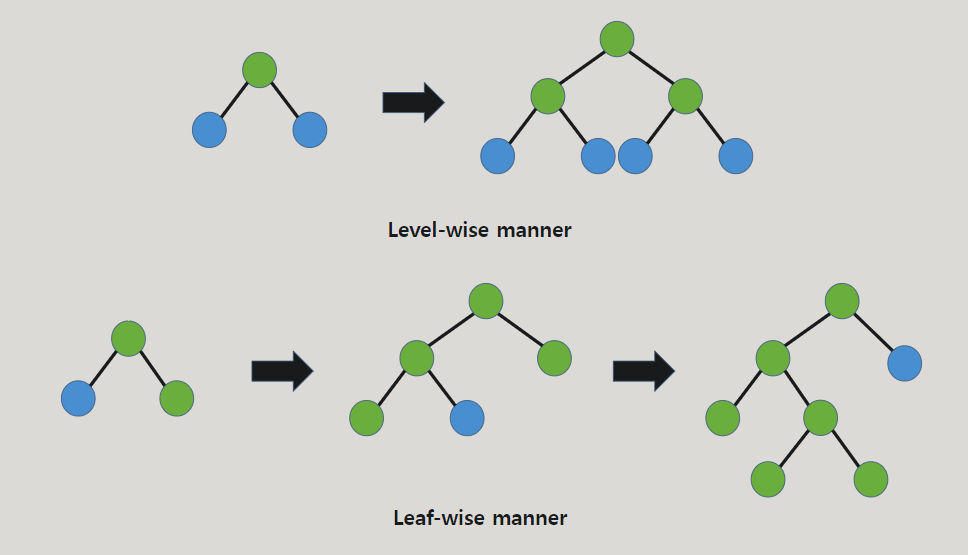

In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

import graphviz
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")

## 파이썬 기반 XGBoost

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# XGBoost는 자체 최적화를 위해 DMatrix 포맷을 사용 → 희소 행렬/캐싱에 유리
# 대규모 데이터일 경우 DMatrix 사용 시 메모리/속도 이점 있음. 범주형 변수는 사전 인코딩 필수
# 분류 문제에서 target은 반드시 0/1 등 정수형 이진값으로 구성되어야 함

In [ ]:
params = {
    'max_depth':  3,
    'eta':        0.1,
    'objective': 'binary:logistic',
    'eval_metric':'logloss',
}

num_rounds = 400
evals = [(dtrain, 'train'), (dtest, 'eval')]

# max_depth: 과적합 방지 핵심 파라미터
# eta: 학습률 (작게 잡고 num_boost_round 늘리는 방식이 일반적)
# eval_metric: 로그로스 외에도 AUC, error 등 가능
# early_stopping_rounds와 함께 사용할 경우, 반드시 eval_set 포함 필수

In [ ]:
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_rounds,
    evals=evals,
    early_stopping_rounds=100,
    verbose_eval=True           # 매 iteration 로그 출력
)

# early_stopping_rounds: 과적합을 방지하고, 최적 반복 수 자동 선택
# logloss가 일정 수준 이하로 더 이상 개선되지 않으면 학습 조기 종료 → 과적합 줄이는 데 효과적
# verbose_eval=True 로 반복 결과 실시간 확인 가능

[0]	train-logloss:0.57969	eval-logloss:0.57574
[1]	train-logloss:0.51209	eval-logloss:0.51024
[2]	train-logloss:0.45618	eval-logloss:0.45606
[3]	train-logloss:0.40938	eval-logloss:0.41211
[4]	train-logloss:0.36912	eval-logloss:0.37292
[5]	train-logloss:0.33476	eval-logloss:0.34081
[6]	train-logloss:0.30570	eval-logloss:0.31115
[7]	train-logloss:0.27823	eval-logloss:0.28527
[8]	train-logloss:0.25407	eval-logloss:0.26366
[9]	train-logloss:0.23435	eval-logloss:0.24322
[10]	train-logloss:0.21539	eval-logloss:0.22644
[11]	train-logloss:0.19997	eval-logloss:0.21051
[12]	train-logloss:0.18513	eval-logloss:0.19655
[13]	train-logloss:0.17116	eval-logloss:0.18668
[14]	train-logloss:0.15876	eval-logloss:0.17321
[15]	train-logloss:0.14766	eval-logloss:0.16354
[16]	train-logloss:0.13777	eval-logloss:0.15501
[17]	train-logloss:0.12812	eval-logloss:0.14774
[18]	train-logloss:0.12007	eval-logloss:0.13865
[19]	train-logloss:0.11310	eval-logloss:0.13227
[20]	train-logloss:0.10654	eval-logloss:0.12676
[2

In [ ]:
print("Best iteration:", xgb_model.best_iteration)
print("Best logloss  :", xgb_model.best_score)

# 0에 가까울수록 ‘예측 확률’이 실제 라벨과 잘 맞는 것
# 일반적으로 0.1 이하면 우수한 확률 예측 성능
# 0.0778 은 높은 신뢰도 · 정확도를 의미

Best iteration: 53
Best logloss  : 0.0778031895353802


In [ ]:
 predicts = xgb_model.predict(dtest)
 print(np.round(predicts[:10], 3))

[1.    0.999 0.001 0.991 0.    0.979 0.992 0.998 0.963 0.832]


In [ ]:
preds = [1 if x>0.5 else 0 for x in predicts]

In [ ]:
print("정확도: {}".format(accuracy_score(y_test, preds)))
print("정밀도: {}".format(precision_score(y_test, preds)))
print("재현율: {}".format(recall_score(y_test, preds)))

# 분류 문제의 성능 평가는 accuracy 외에도 precision/recall을 반드시 확인해야 함

정확도: 0.9736842105263158
정밀도: 0.972972972972973
재현율: 0.9863013698630136


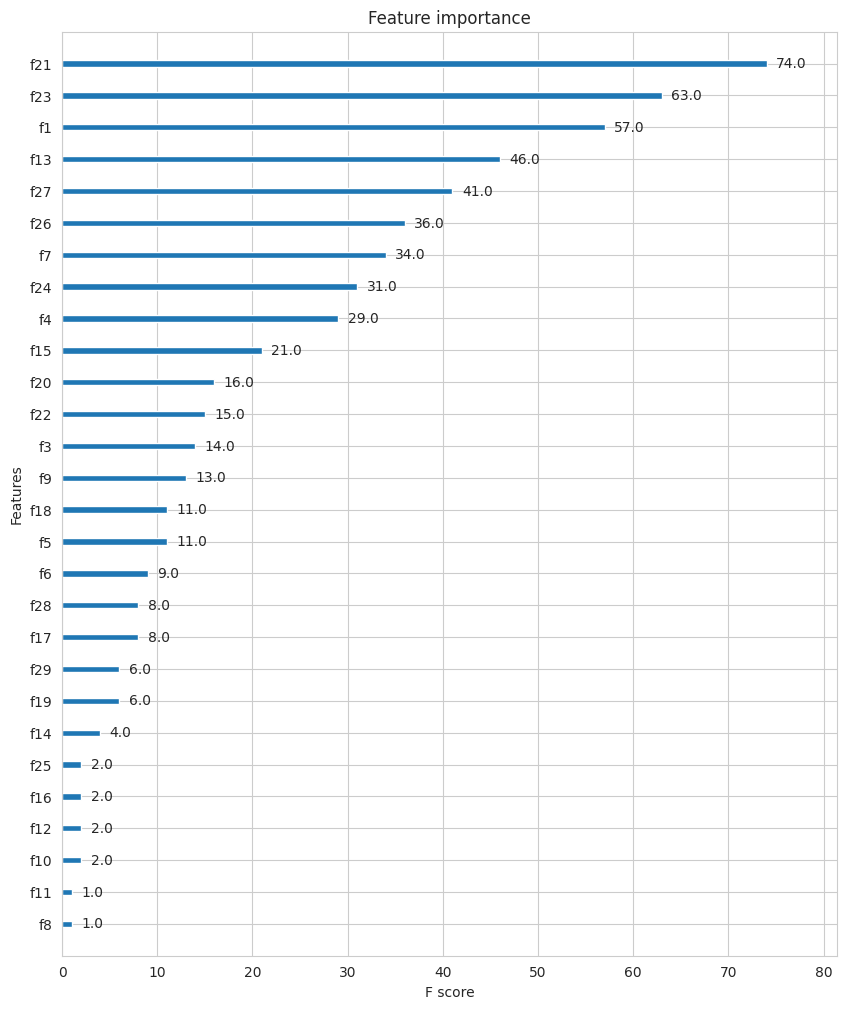

In [ ]:
 fig, ax = plt.subplots(figsize=(10, 12))
 plot_importance(xgb_model, ax=ax);

 # feature별 예측 기여도 확인

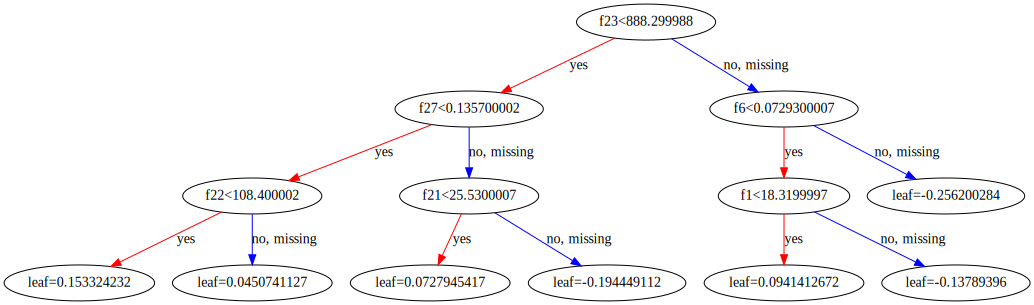

In [ ]:
tree = xgb.to_graphviz(xgb_model, num_trees=0)
tree

# 첫 번째 트리의 split 기준 확인 → 규칙 기반 해석 가능
# 과적합 여부를 시각적으로 확인

## XGBClassifier

### 붓꽃 데이터

In [ ]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

# iris는 다중 클래스 분류 (3개 클래스)

하이퍼파라미터 설정 → 예측 · 확률 추출

In [ ]:
 xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3) #부스팅 트리 400개 사용, learning rate: 각 트리가 학습에 기여하는 비율(학습률), 각 트리의 최대 깊이(과적합 방지)
 xgbc.fit(X_train, y_train)
 preds = xgbc.predict(X_test)  #X_test에 대한 최종 클래스 레벨(0, 1) 예측라벨 배열
 preds_proba = xgbc.predict_proba(X_test)[:, 1]  #각 클래스별 예측확률 반환, 1 클래스 확률만 추출

 # 만약, 실무에서 RawData에 범주형 변수가 있으면 인코딩(원핫 등) 필요, eval_set이나 early stopping rounds 추가하면 과적합 방지할 수 있음

교차검증, 평가

In [ ]:
cross_val = cross_validate(
    estimator=xgbc,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

# estimator를 5개의 fold로 나눠 반복 학습하고 평가
# fit time: 각 fold별 학습 소요 시간
# score time: 각 fold별 평가(예측) 소요 시간
# test score: 각 fold별 모델 성능(기본적으로 estimator score인데, 분류는 정확도 봄)

# 평균 학습시간, 평균 예측시간, 평균 테스트 점수
# 각 평가는 위 항목에 대한 평균과 표준편차로 출력하여 판단

#결과값 해석
# 1. avg fit time: 0.690948486328125 (+/- 0.7173519735000627) : 평균 0.7초인데, 표준편차도 0.7초라 fold마다 학습시간이 들쭉날쭉함
# 2. avg score time: 0.014729022979736328 (+/- 0.014128133178527928) : 평균 0.14로 매우 짧고, 표준편차도 적어서 안정적
# 3. avg test score: 0.9533333333333334 (+/- 0.016329931618554516) : 정확도 95%, 표준편차 1.6%로 성능편차 크지 않음. 모델의 일관된 일반화 성능 보여줌


avg fit time: 0.690948486328125 (+/- 0.7173519735000627)
avg score time: 0.014729022979736328 (+/- 0.014128133178527928)
avg test score: 0.9533333333333334 (+/- 0.016329931618554516)


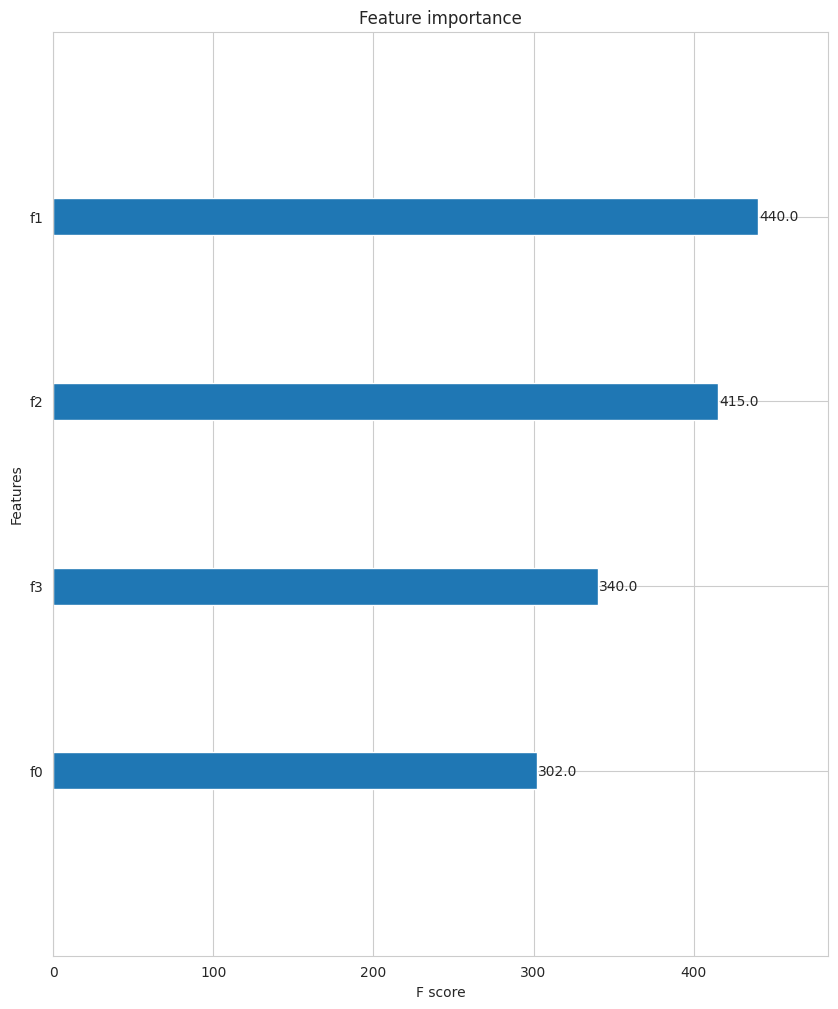

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax);

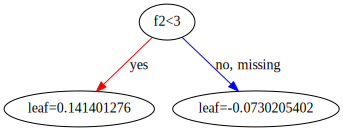

In [ ]:
tree = xgb.to_graphviz(xgbc, num_trees=0)  # num_trees=0 은 첫 번째 트리
tree

### 와인 데이터

In [ ]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=123)

In [ ]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:, 1]

In [ ]:
cross_val = cross_validate(
    estimator=xgbc,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 1.5939800262451171 (+/- 1.0232945891944694)
avg score time: 0.014020347595214843 (+/- 0.010206945054354924)
avg test score: 0.9553968253968254 (+/- 0.03325538883960416)


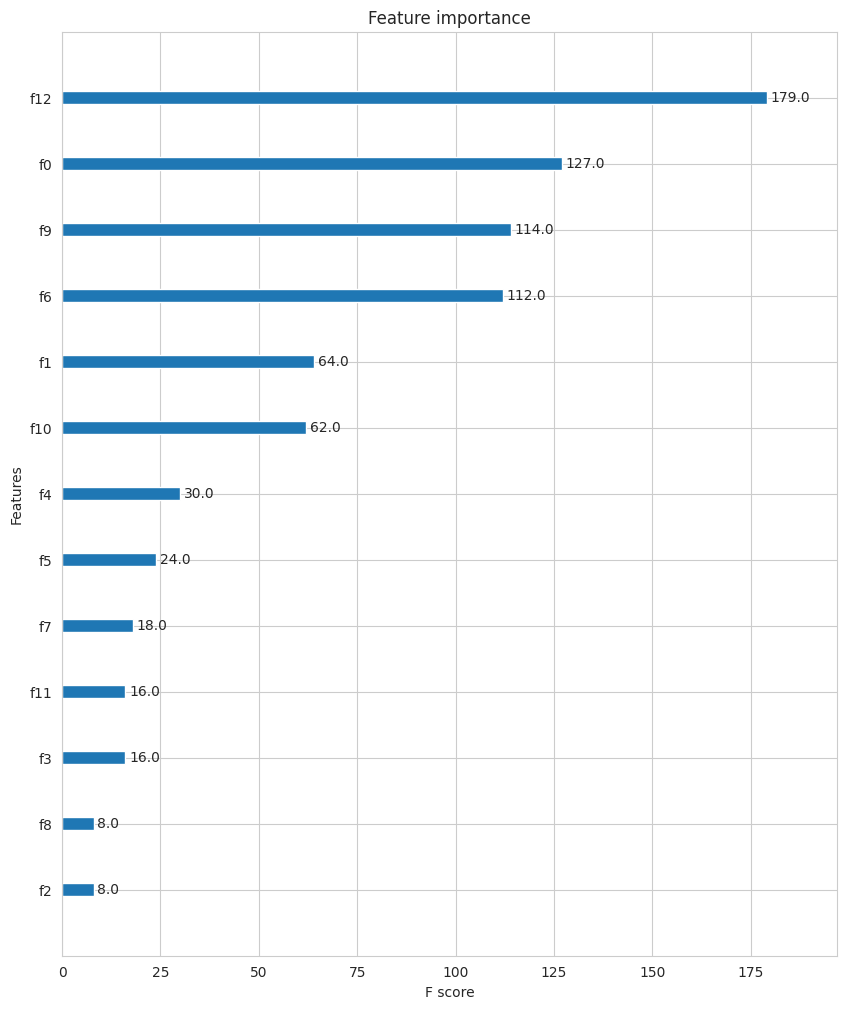

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax);

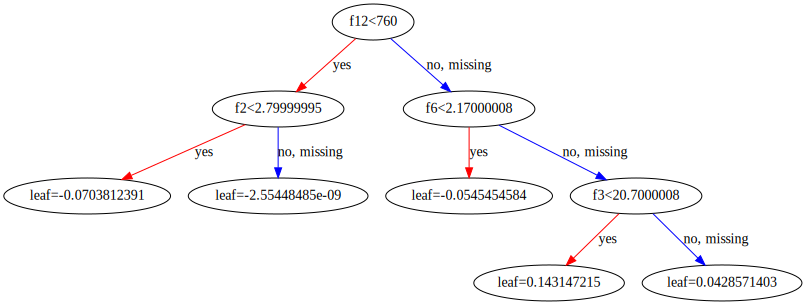

In [ ]:
tree = xgb.to_graphviz(xgbc, num_trees=0)
tree

*이탤릭체 텍스트*## XGBRegressor

### 캘리포니아 주택 가격 데이터

In [ ]:
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=123)

In [ ]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective ='reg:squarederror')
xgbr.fit(X_train, y_train)
preds = xgbr.predict(X_test)

In [ ]:
cross_val = cross_validate(
    estimator=xgbr,
    X=housing.data, y=housing.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.9068413257598877 (+/- 1.0197756141253078)
avg score time: 0.017333316802978515 (+/- 8.274002743169182e-05)
avg test score: 0.6939004239434826 (+/- 0.019962643084485265)


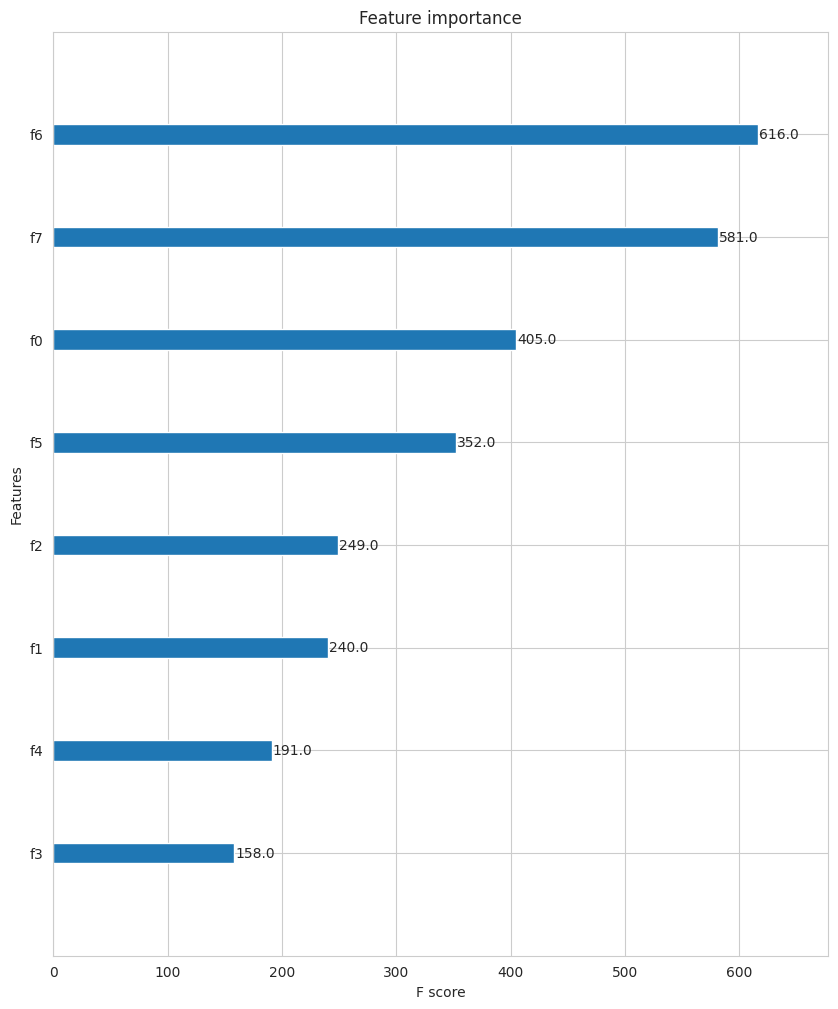

In [ ]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbr, ax=ax);

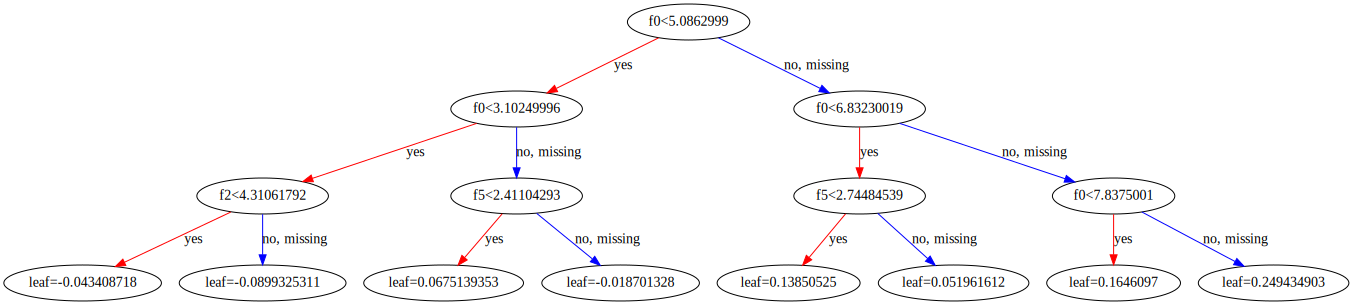

In [ ]:
tree = to_graphviz(xgbr, num_trees=0)
tree

### 당뇨병 데이터

In [ ]:
 diabetes = load_diabetes()
 X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2,random_state=123)

In [ ]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective ='reg:squarederror')
xgbr.fit(X_train, y_train)
preds = xgbr.predict(X_test)

In [ ]:
cross_val = cross_validate(
    estimator=xgbr,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.5006230354309082 (+/- 0.6338395974136047)
avg score time: 0.007403850555419922 (+/- 0.009082198059607216)
avg test score: 0.3028089266858058 (+/- 0.0860008532979482)


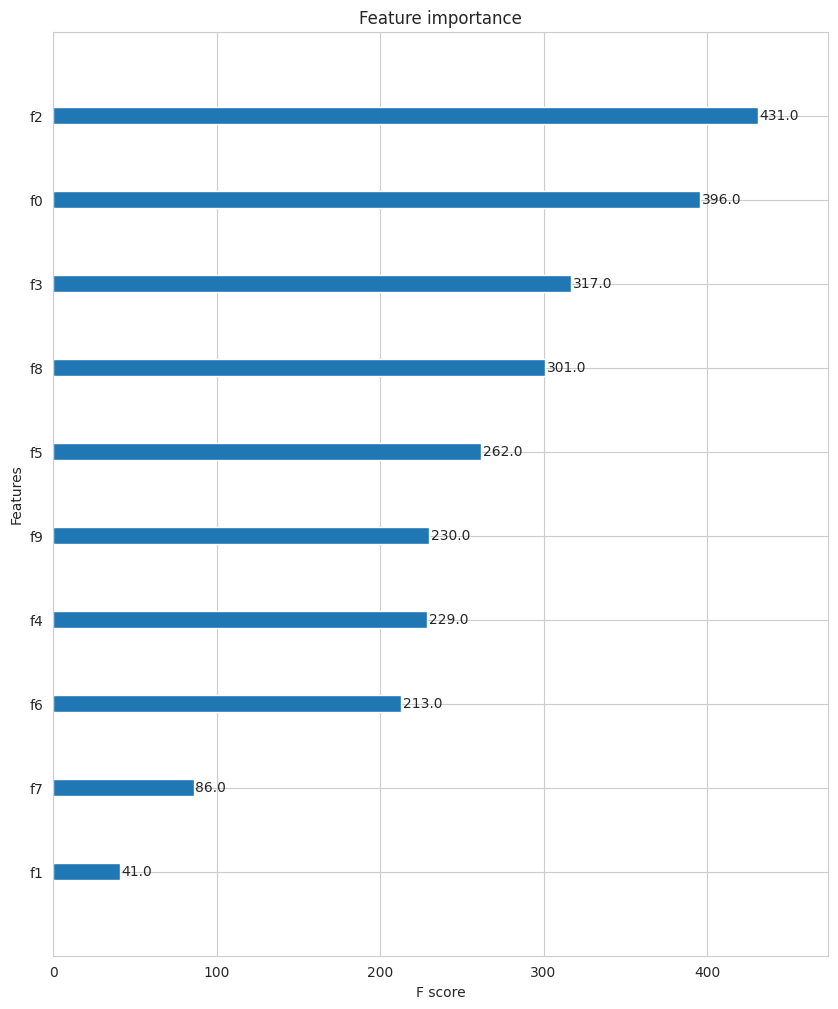

In [ ]:
 fig, ax = plt.subplots(figsize=(10, 12))
 plot_importance(xgbr, ax=ax);

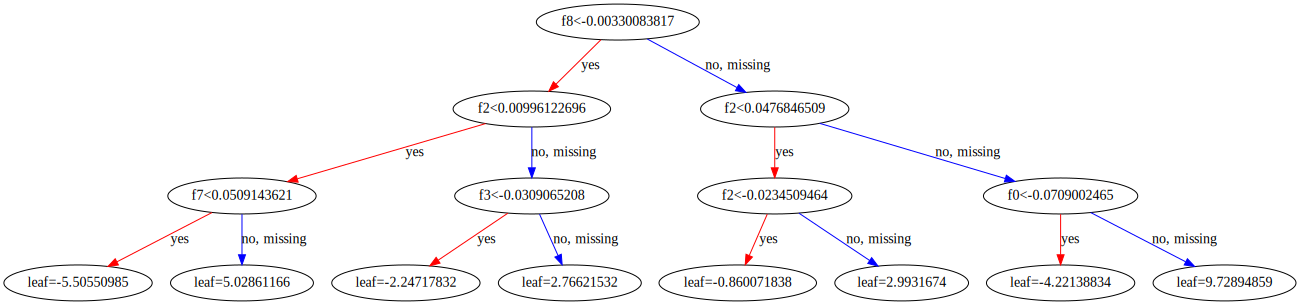

In [ ]:
tree = to_graphviz(xgbr, num_trees=0)
tree

# XGBoost 분류 vs. 회귀 활용 시 유의사항

## 1. 손실함수(Objective)·평가지표(Eval Metric) 차별화
- **분류**  
  - `binary:logistic`, `multi:softprob` 등 이진·다중분류용 손실함수  
  - `logloss`, `error`, `auc` 등 분류 전용 평가지표  
- **회귀**  
  - `reg:squarederror`, `reg:logistic` 등 회귀용 손실함수  
  - `rmse`, `mae`, `r2` 등 회귀 전용 평가지표  

## 2. 타깃(Label) 데이터 타입 확인
- **분류**: 0·1 또는 정수 클래스 형태  
- **회귀**: 연속형 실수값  

## 3. 예측결과 후처리(Post-processing) 상이
- **분류**:  
  1. `predict_proba()` → 확률 반환  
  2. 임계값(threshold) 기반 클래스 변환  
- **회귀**:  
  - `predict()` → 연속값 그대로 사용  

## 4. 교차검증(CV) 분할 전략 구분
- **분류**: `StratifiedKFold` → 클래스 비율 유지  
- **회귀**: 일반 `KFold`  

## 5. 하이퍼파라미터 튜닝 관점 차이
- **분류**:  
  - `eta`, `max_depth` 조정  
  - 불균형 클래스 대응용 `scale_pos_weight`  
- **회귀**:  
  - `subsample`, `colsample_bytree` 조정  
  - 과적합 제어용 `alpha`, `lambda`  

## 6. 타깃 분포·스케일링 고려
- **분류**: 특성 스케일링 불필요 (트리 기반 알고리즘)  
- **회귀**:  
  - 타깃 값 범위 크거나 왜곡 시 로그 변환·표준화 검토  

## 7. Early Stopping 활용 시 Eval Set 구성
- `eval_metric` 을 작업 목적에 맞게 지정  
  - 분류: `error`, `auc`  
  - 회귀: `rmse`, `mae`  
- `early_stopping_rounds` 사용 시 반드시 `evals` 설정  

## 8. 변수 중요도(Feature Importance) 해석 주의
- **분류**: 지니·엔트로피 감소 기여 기반  
- **회귀**: 잔차 감소 기여 기반  
- 동일 순위라도 기여도 해석 관점 상이  

## 9. 모델 해석·활용 목적 구분
- **분류**:  
  - 리스크 경고·이상 탐지 시스템  
  - 확률 기반 임계 알람 설정  
- **회귀**:  
  - 가격·수요 예측  
  - 연속값 예측 정확도 중시  

## 10. 성능 보고서 작성 시 지표 명확 구분
- **분류**:  
  `accuracy`, `precision`, `recall`, `roc_auc` 등  
- **회귀**:  
  `rmse`, `mae`, `r2_score` 등  









### 참고

김가혜, 김재희, & 김희웅. (2025). 아동 학대 요인 파악 및 예측 모델 개발: 혼합 방법론적 접근. 정보화정책

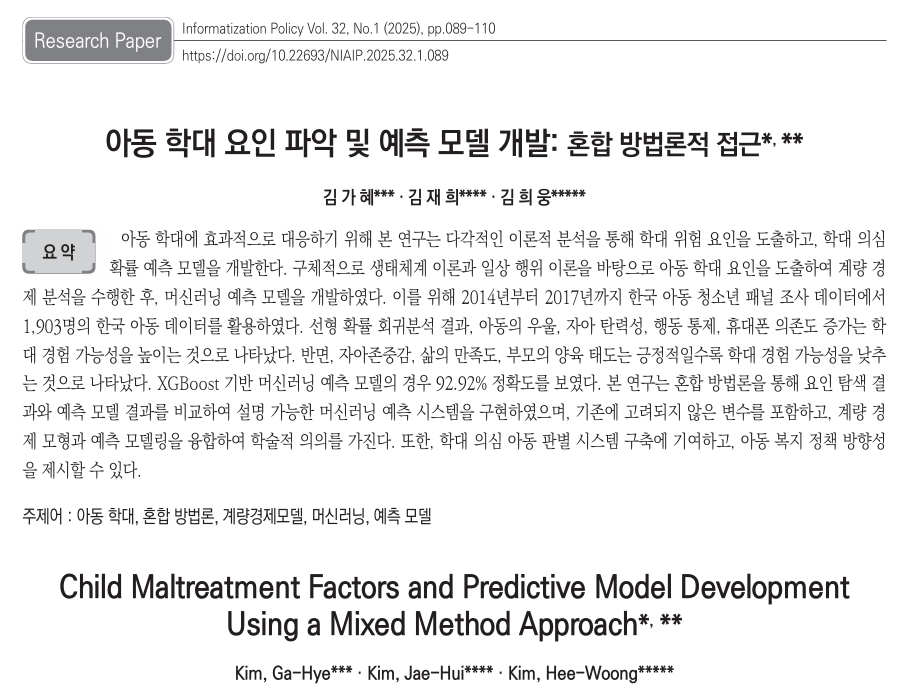

1. 논문 주제: 머신러닝을 활용한 정밀한 학대 의심 확률 예측 모델 개발

2. 연구 방법
 - 독립변수 20개를 선정하고, 계량경제모형(선형 확률 회귀모형)과 머신러닝 모델을 결합하여 분석

3. 모델 적용 결과
  - XGBoost 모델은 다른 머신러닝 모델(LightGBM, Random Forest, Neural Network, TabNet)보다 뛰어난 성능을 보임

4. 시사점
 - XGBoost는 아동학대와 같은 복잡한 사회 문제를 해결하는 데 효과적이며, 특히 다음과 같은 장점 덕분에 널리 사용됨
 - 높은 예측 정확도와 안정성: 학대 여부와 같은 민감하고 중요한 예측을 신뢰성 있게 수행
 - 변수 중요도 및 SHAP value 활용 가능: 학대에 가장 큰 영향을 미치는 주요 요인을 명확히 파악 가능
 - 데이터의 불균형 문제 효과적 처리: 소수의 학대 의심 사례를 효과적으로 찾아내는 데 뛰어난 성능을 보임


 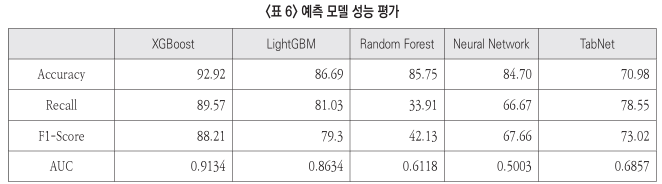

 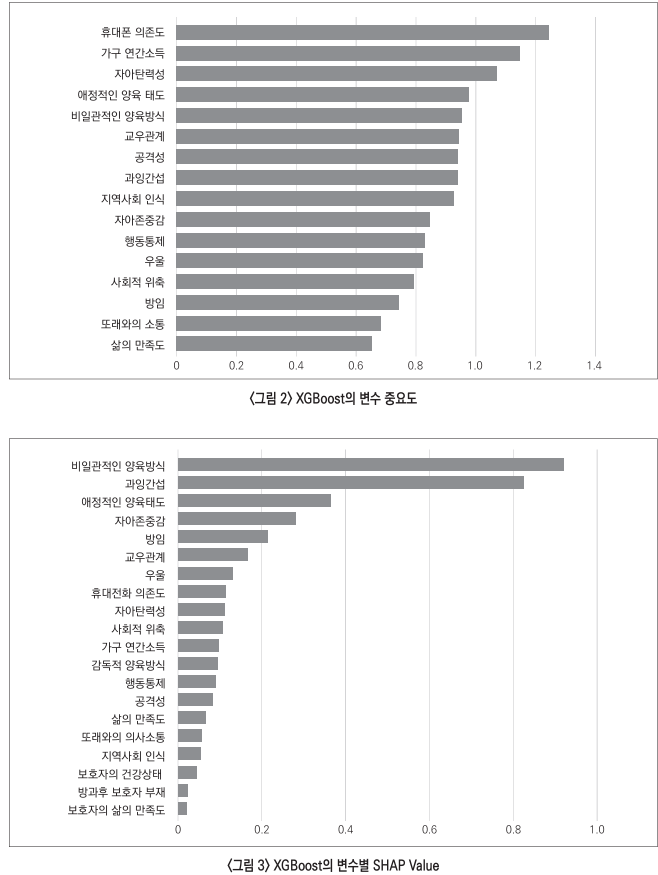